# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 评估和数据清理

为了区分清理后的数据与清理前的数据，用original_data 来表示原始的数据，cleaned_data 来表示清理后的数据，即之后的所有操作都将运用与cleaned_data ，而original_data与cleaned_data两者用copy 来进行复制。

对于数据的评估与清理，我们用数据的两个方面来进行：结构与内容，即整齐度和干净度。

数据的结构性问题指的是不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”的三原则；数据的内容性问题指的是不符合“数据类型正确，数值范围正确，无缺失值”的三原则。



#### 数据整洁度

下面用head函数来查看一下数据的前5行，粗略的看一下数据的样子。

In [2]:
original_data = pd.read_csv(r"C:\Users\31665\Desktop\pycharm\pandas\素材\penguins.csv")
cleaned_data =original_data.copy()
cleaned_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


在这5行数据中，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”的格式，因此不存在结构性问题。当然我们不能仅取前5行数据就对整个数据集下过早的结论，所以我们可以用samole函数来随机抽取一些数据进行验证。

In [3]:
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
48,Adelie,Dream,36.0,17.9,190.0,3450.0,FEMALE
330,Gentoo,Biscoe,50.5,15.2,216.0,5000.0,FEMALE
139,Adelie,Dream,39.7,17.9,193.0,4250.0,MALE
314,Gentoo,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
187,Chinstrap,Dream,47.5,16.8,199.0,3900.0,FEMALE
263,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,MALE
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,MALE
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,MALE
172,Chinstrap,Dream,42.4,17.3,181.0,3600.0,FEMALE
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,FEMALE


由验证可知，我们的结论是正确的，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”的格式，不存在结构性问题。接下来，我们看内容是否由问题。

####  数据干净度

第一步，用info（）函数来查看数据的整体信息，对数据进行大致的了解，以便对之后的操作进行铺垫。

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从分析结果来看，cleaned_data数据集共有344条观察值，而culmen_length_mm, culmen_depth_mm ,flipper_length_mm,body_mass_g 的数据数量仅有342条，这说明这4个变量中有2条数据缺失，这将在后续进行评估和清理。

而从数据类型来看，我们已经知道species，sex，island都是分类数据，因此可以把数据类型都转化为Category类型。

In [5]:
cleaned_data["species"] = cleaned_data["species"].astype("category")
cleaned_data["sex"] = cleaned_data["sex"].astype("category")
cleaned_data["island"] = cleaned_data["island"].astype("category")

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


刚才从info（）中看到的几个数据变量存在缺失值，需要进行处理。

首先，我们需要对缺失的值进行查看。

In [7]:
cleaned_data.query('culmen_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
cleaned_data.query('flipper_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
cleaned_data.query('body_mass_g.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


由以上的表格可以看出，索引为3和339的观察值，除了种类和所属的岛屿以外所有的数据都是空值，无法为探索提供任何有用的信息，因此只要把这两行删除掉就可以保证数据的干净度。

In [10]:
cleaned_data.drop(3,inplace=True)
cleaned_data.drop(339,inplace=True)
cleaned_data.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失的sex数据的行的其他数据具备一定的价值，我们要将其保留，而Pandas以及Matplotlib,Seaborn会自动忽略缺失值，可以保留这两行数据。

#### 处理重复数据

根据数据的变量的含义以及内容来分析，这些数据中都允许存在重复值，所以我们不需要对重复的数据进行删除或者其他的处理。

#### 处理不一致的数据

不一致的数据可能存在于所有的分类变量中，所以我们要查看是否存在不同值实际指代同一种含义的情况。对此，我们可以使用value_counts()函数来分别查看每种数据中是否存在不一致的情况。

In [11]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [12]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [13]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

由以上数据分析，species和island列里不存在不一致数据，但sex列表里存在一个英文句号值，并不代表任何的性别，我们可以将其替换为缺失值，以保证数据的正确性，下面利用replace方法将其替换为缺失值。|

In [14]:
cleaned_data['sex'] = cleaned_data['sex'].replace('.',np.nan)
cleaned_data['sex'].value_counts()

C:\Users\31665\AppData\Local\Temp\ipykernel_8540\511551256.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data['sex'] = cleaned_data['sex'].replace('.',np.nan)


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

英文句号已经被替换为空值，因此sex列里不存在不一致的数据。

#### 处理无效或者错误数据

可以通过DataFrame的descibe方法，对数值统计信息进行快速了解。

In [15]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


由以上的统计信息来看，cleaned_data数据里不存在脱离实际意义的异常值。

## 数据探索

可以将数据进行数据的可视化，进行探索和分析，从图表中获得企鹅样本数据的相关洞察。

首先在开始之前调一下色盘，不然颜色太单调，pastel为彩色粉笔色。

In [16]:
sns.set_palette('pastel')

In [17]:
cleaned_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


由图表可知，表中的企鹅的物种，岛屿和性别，即species,island,sex三列数据都是分类变量，可以使用饼图来绘制，从而查看各个类型的占比。

### 分类变量的图表化

#### 企鹅的种类比例


为了得到species的饼图，我们首先需要绘制出一个汇总数据的表格，使用groupby函数进行聚合运算。

In [18]:
##可以使用groupby()函数来对数据进行分组，然后使用count()函数来计算每个分组的数量。
species_count = cleaned_data.groupby('species')["island"].count()

## 或者使用value_counts()函数来汇总。
species_count = cleaned_data["species"].value_counts()

species_count


C:\Users\31665\AppData\Local\Temp\ipykernel_8540\1785700740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_count = cleaned_data.groupby('species')["island"].count()


species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

正式绘制饼图，使用plt中的pie函数绘制，并添加autopct参数来显示百分比，添加labels参数来显示名称，最后使用plt.show()函数来显示图形。

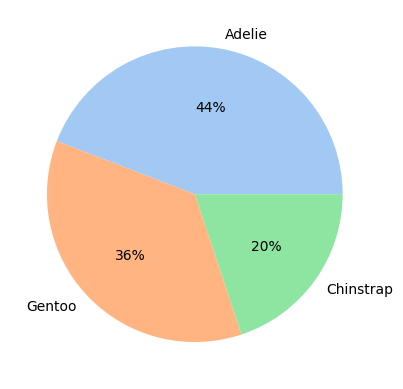

In [19]:
plt.pie(species_count,autopct='%.0f%%',labels=species_count.index)

plt.show()

从饼图可以看出，样本之中Adelie这个种类的企鹅数量是最多的，而Gentoo的数量为其次，Chinstrap的数量最少。

#### 企鹅所属岛屿比例

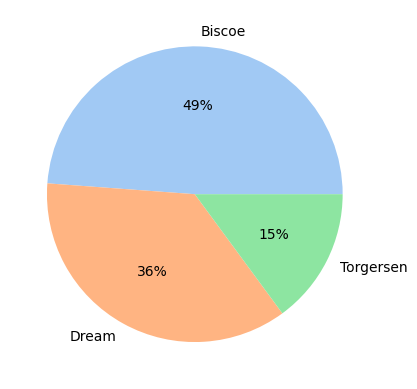

In [20]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count,autopct='%.0f%%',labels=island_count.index)

plt.show()

从上可以看出，样本中几乎有一半的样本，即企鹅在Biscoe所属的岛屿上，数量是最多的，占比最大，其次是Dream，最后是Torgersen。

#### 企鹅的性别比例

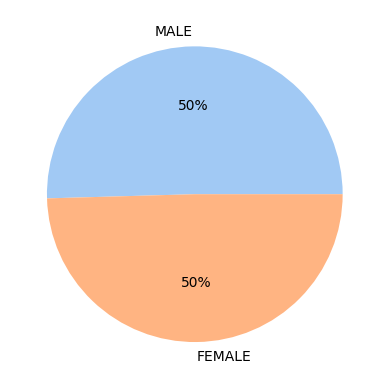

In [21]:
sex_count = cleaned_data["sex"].value_counts()
plt.pie(sex_count,autopct='%.0f%%',labels=sex_count.index)

plt.show()

因为此次数据为真实的随机样本，所以预测性别比例为1：1，而实际的数据也为1：1，符合预期的结果，不存在过拟合的情况。

#### 不同岛屿上的企鹅的种类数量

以上都是在单独的看各个分类变量的比例，当然我们可以将单个分类变量结合起来看。我们可以使用上面的value_counts()函数来计算每个分类变量的比例或者使用groupby()函数来计算每个分类变量的比例，但是我们还有一种更加简单的方法，那就是使用sns库中的countplot函数。

<Axes: xlabel='island', ylabel='count'>

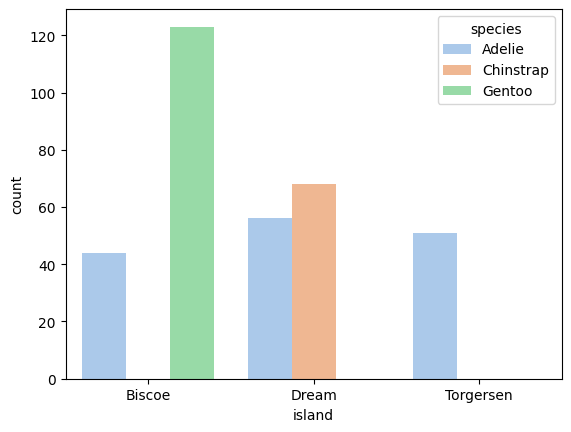

In [22]:
sns.countplot(cleaned_data,x='island',hue='species')

由这个多分类变量图表可得出，Adelie企鹅在各个岛屿上都有分布，而Gentoo企鹅仅在Torgersen岛屿上分布，而Chinstrap企鹅仅在Dream_island上有分布。

#### 不同岛屿上的企鹅性别的数量

<Axes: xlabel='island', ylabel='count'>

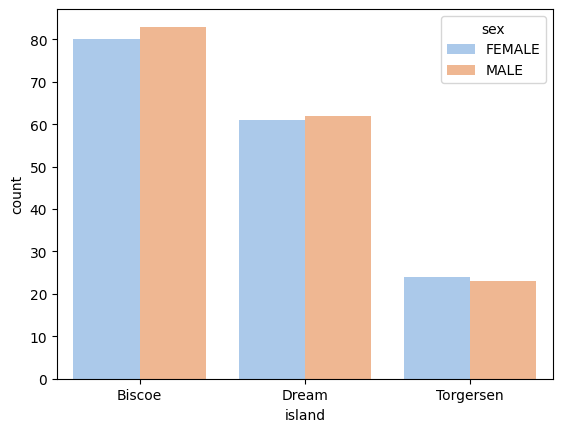

In [23]:
sns.countplot(cleaned_data,x='island',hue='sex')

### 数值变量的图表化

对于数值数据，我们有很多图表可以使用，比如：直方图、散点图、折线图、面积图等。但是，为了更高效的探索数值之间的关系，我们可以使用成对图pairplot。

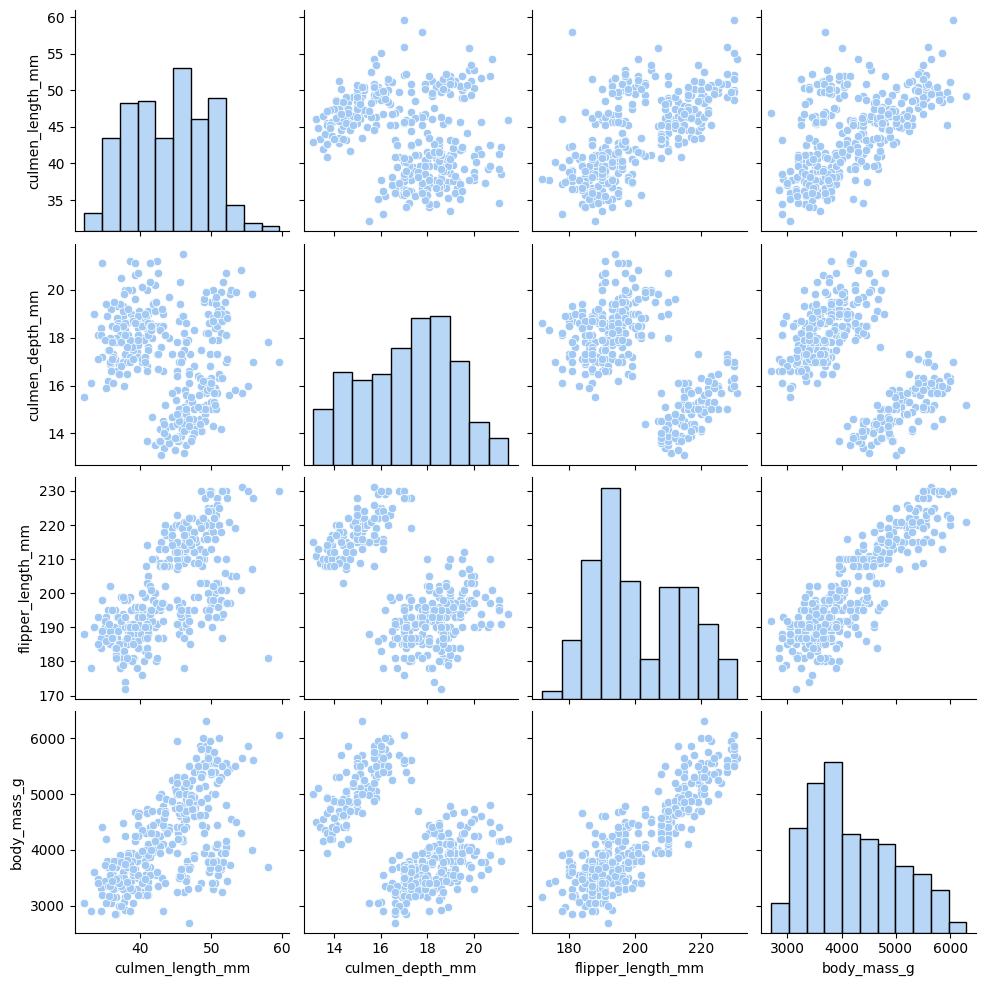

In [24]:
sns.pairplot(cleaned_data)
plt.show()

从直方图来看，企鹅样本的嘴峰长度，嘴峰深度，鳍长度，体重的分布都不是正态分布，一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面说明，样本的数量是不够大的。

从散点图来看，可以明显的看出存在多个集群，可能与某种因素有关，比如：企鹅性别，种类。因此需要进一步的分析。

#### 根据种类查看数据之间的相关关系

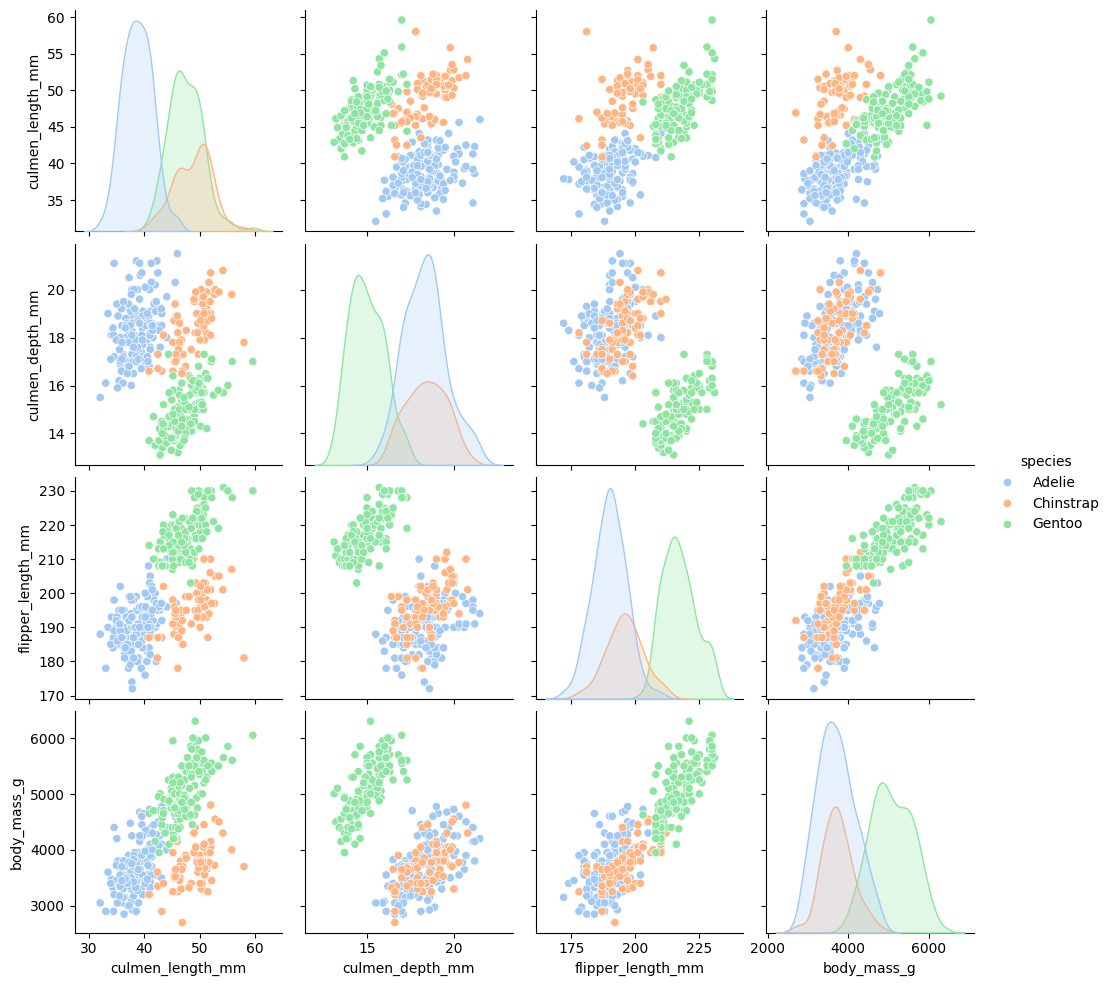

In [25]:
sns.pairplot(cleaned_data,hue='species')

同一种类的企鹅样本数据在散点图上基本都聚集在一起，说明的确企鹅的物种分类是可以影响嘴峰长度，宽度，鳍长度，体重之间的关系的。下面用线性回归模型来预测企鹅的体重，即加入参数kind=‘reg’,与此同时，还可以加入参数plot_kws={‘sactter_kws’:{‘alpha’:0.3}}，来设置线性回归的透明度。

其中‘sactter_kws’是指的是散点图的意思，‘alpha’指的是透明度。

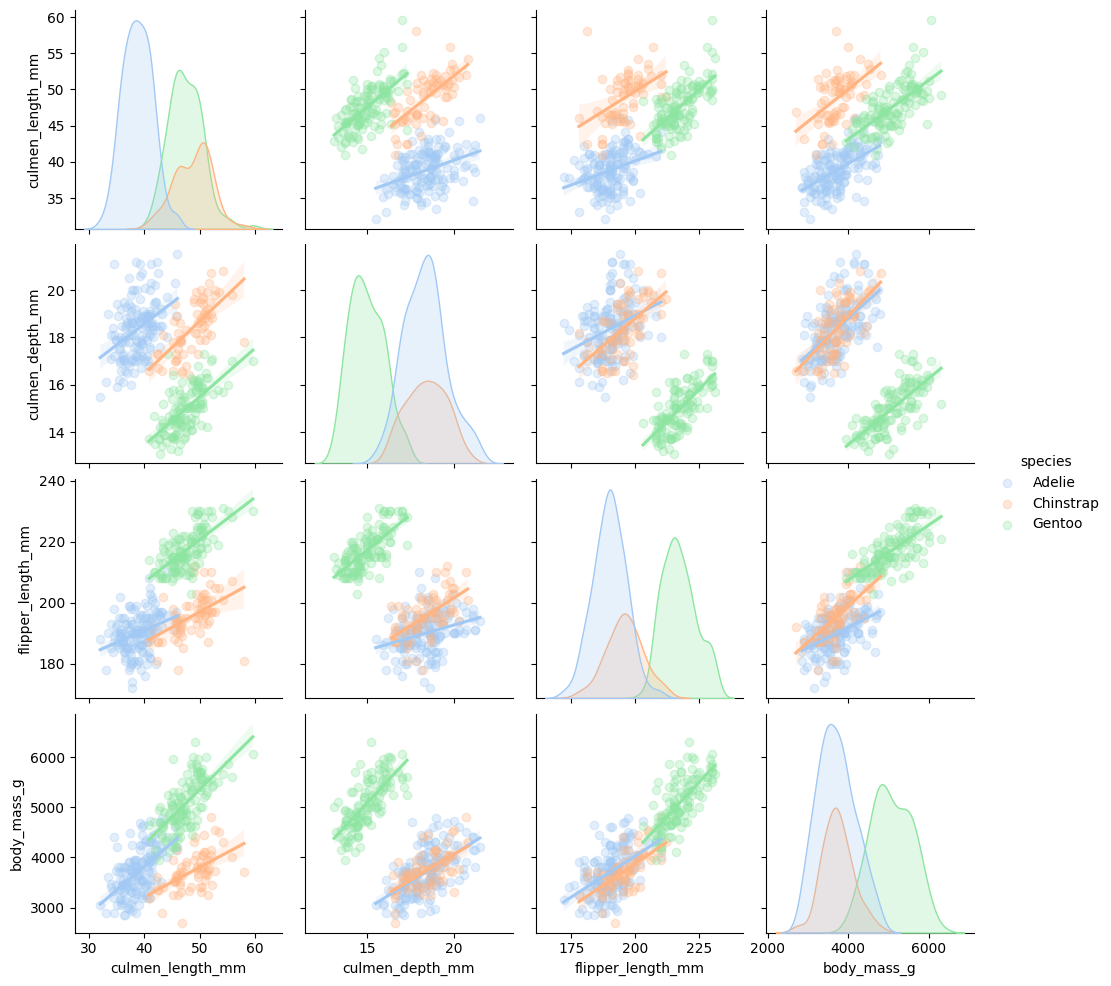

In [26]:
sns.pairplot(cleaned_data,hue='species',kind='reg',plot_kws={'scatter_kws':{'alpha':0.3}})

结合散点图的回归线性方程来看，同类企鹅的属性数据之间均呈现线性正比，即嘴峰越长，嘴峰的深度越深，鳍长度越长，体重也越重，反之亦然。

从密度分布图可以看得出，关于样本数据的发现有如下：

    1.Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
    2.Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
    3.Adelie的鳍长度最短，Chinstrap的鳍长度为中等，而Gentoo的鳍长度最长。
    4.Adelie和Chinstrap的体重范围较为接近，而Gentoe的体重更重。
但不同种类的属性数据是否存在统计学显著性差异，仍要进行假设性检验之后才能得到结论。

#### 根据性别查看数据之间的相关关系

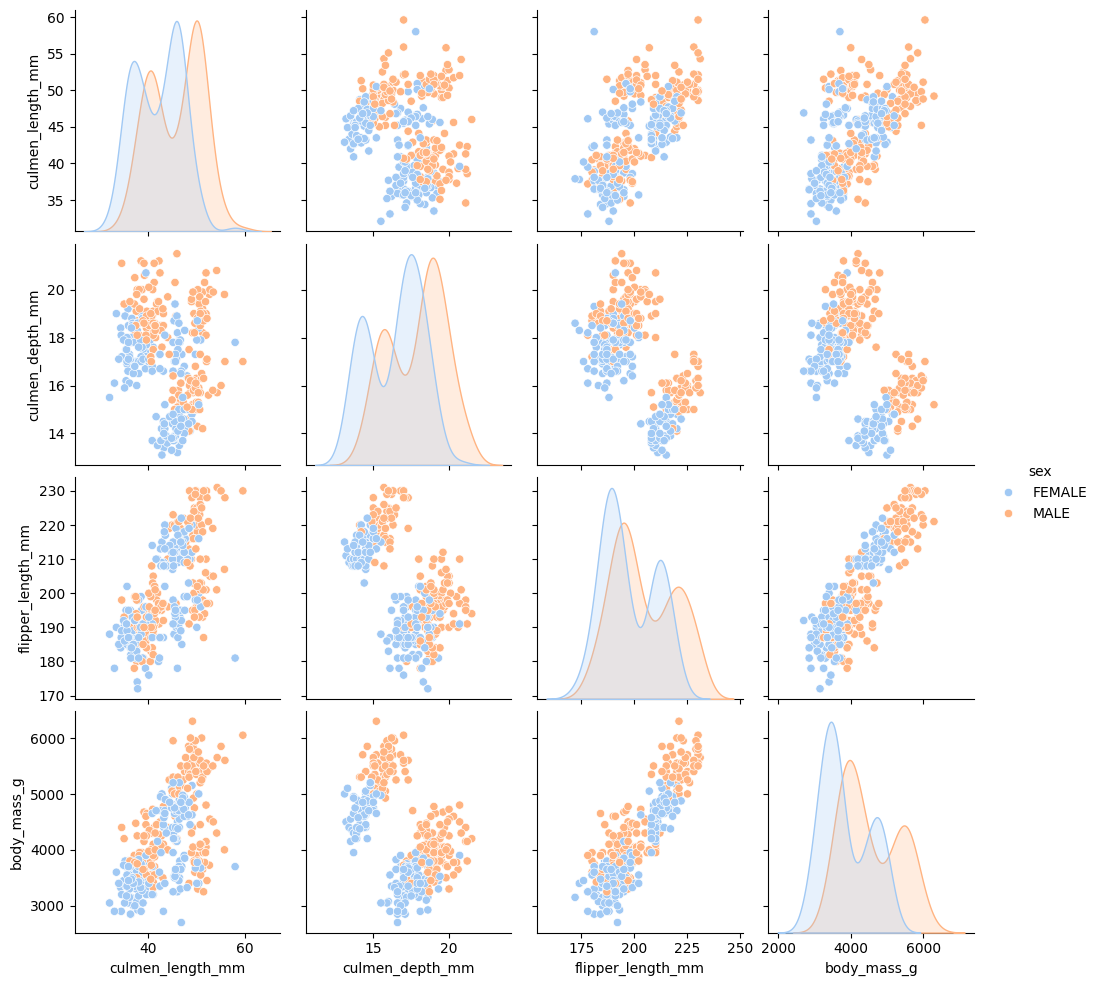

In [27]:
sns.pairplot(cleaned_data,hue='sex')

从这次图例中可以非常明显的看出，样本中雄性企鹅在各项数据上的数值都大于雌性企鹅。